# Research of cAlgo exported TICK data

### Extracting from cAlgo
used this cBot to export data: http://ctdn.com/algos/cbots/show/588

had to change c# code slightly to extract Bid & Ask but not from depth.<br>
logic: when backtesting on cAlgo, it uses Bid & Ask without knowledge of depth<br>
also: <strong>spread</strong> is simple ASK - BID calculation performed during export

## Python Code:

In [3]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
### creating inputs:
pair = "EURUSD"



folder = "../data/"
csv = folder + pair +'-ticks.csv'

print csv

../data/EURUSD-ticks.csv


content of csv file:

date,ask,bid,spread<br>
2013-04-26 15:16:54.372,1.226800,1.226670,0.000130<br>
2013-04-26 15:16:54.583,1.226820,1.226690,0.000130<br>
2013-04-26 15:16:54.583,1.226810,1.226690,0.000120


In [4]:
### Importing csv file

usecols = ['date', 'ask', 'bid']
#dtypes = {'date':pd.tslib.Timestamp, 'ask':np.float32, 'bid':np.float32, }
data = pd.read_csv(csv,
                   header = False,
                   usecols = usecols,
                   #dtype=dtypes,
                   parse_dates=['date']
                   #date_parser = dateparse
                   )




In [9]:
clean = data[data.ask - data.bid > 0].copy()

In [10]:
clean.count()

date    28097417
ask     28097417
bid     28097417
dtype: int64

In [4]:
### compute spread and convert to pips (not points)
data['spreadPips'] = (data.ask - data.bid)*10000

In [5]:
#display what we have
data.head()

,date,ask,bid,spreadPips
0,2013-04-26 15:11:09.298,1.30252,1.30247,0.5
1,2013-04-26 15:11:09.298,1.30252,1.30247,0.5
2,2013-04-26 15:16:02.148,1.30297,1.30295,0.2
3,2013-04-26 15:16:02.360,1.30298,1.30297,0.1
4,2013-04-26 15:16:02.623,1.30304,1.30301,0.3


## Interesting bit:

In [6]:
###copy all negative spreads
neg = data[data.spreadPips < 0]

In [7]:
many = '{0:,}'.format(neg.spreadPips.count())
print "So we have %s records with negative Spread!"  %many

So we have 1,686,043 records with negative Spread!


# So many ticks with negative spread?!?

(array([  2.50000000e+01,   3.40000000e+01,   1.49000000e+02,
          2.27000000e+02,   6.19000000e+02,   2.29700000e+03,
          6.09300000e+03,   1.67520000e+04,   1.01957000e+05,
          1.55789000e+06]),
 array([-85.1, -76.6, -68.1, -59.6, -51.1, -42.6, -34.1, -25.6, -17.1,
         -8.6,  -0.1]),
 <a list of 10 Patch objects>)

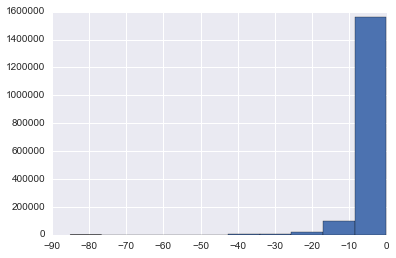

In [8]:
plt.hist(neg.spreadPips.values, bins = 10)

## Let's zoomin on numbers below -10pip

(array([  2.10000000e+01,   3.10000000e+01,   6.20000000e+01,
          1.82000000e+02,   2.76000000e+02,   9.33000000e+02,
          2.53700000e+03,   5.95300000e+03,   1.45070000e+04,
          6.76790000e+04]),
 array([-85.1 , -77.59, -70.08, -62.57, -55.06, -47.55, -40.04, -32.53,
        -25.02, -17.51, -10.  ]),
 <a list of 10 Patch objects>)

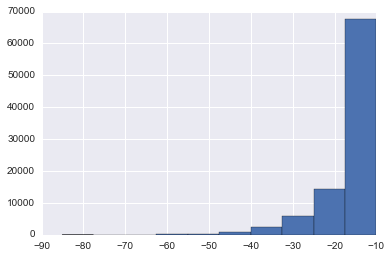

In [9]:
neg1 = neg[neg.spreadPips < -10]
plt.hist(neg1.spreadPips.values)

## Lets zoomin below -30 pips (not points)

(array([   14.,    26.,    17.,    50.,   147.,   141.,   221.,   749.,
         1426.,  2635.]),
 array([-85.1 , -79.59, -74.08, -68.57, -63.06, -57.55, -52.04, -46.53,
        -41.02, -35.51, -30.  ]),
 <a list of 10 Patch objects>)

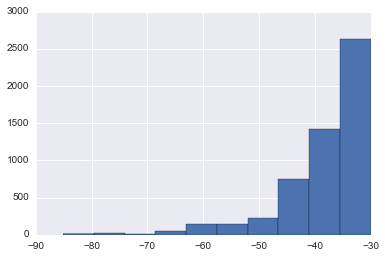

In [10]:
neg2 = neg[neg.spreadPips < -30]
plt.hist(neg2.spreadPips.values)

# Lets see entries for below -45 pips!

In [11]:
neg45 = neg[neg.spreadPips < -45]
print "We have %s ticks with spread below -45 pips! " %neg45.spreadPips.count()


We have 774 ticks with spread below -45 pips! 


In [12]:
neg45.head(100)

,date,ask,bid,spreadPips
23592439,2015-06-02 10:10:50.394,1.09904,1.10363,-45.9
23592440,2015-06-02 10:10:50.394,1.09905,1.10363,-45.8
23592441,2015-06-02 10:10:50.820,1.09905,1.10367,-46.2
23592444,2015-06-02 10:10:51.677,1.09897,1.10348,-45.1
23592445,2015-06-02 10:10:52.067,1.09897,1.10352,-45.5
23592446,2015-06-02 10:10:52.067,1.09896,1.10352,-45.6
23592460,2015-06-02 10:10:56.347,1.09889,1.10343,-45.4
23592461,2015-06-02 10:10:56.777,1.09889,1.10350,-46.1
23592462,2015-06-02 10:10:57.194,1.09889,1.10354,-46.5
23592463,2015-06-02 10:10:57.194,1.09890,1.10354,-46.4
